## <center><font color='black'> DEEPTHI SUDHARSAN (ROLL NUMBER : CB.EN.U4AIE19022)</font></center>
## <center><font color='black'> AI IN NLP ASSIGNMENT 1 </font></center>

## QUESTION 1

### 1. Write python code to read a sentence from a text file

In [9]:
sentences_list = open("textdata.txt", "r").readlines()
for i in range(len(sentences_list)):
    sentences_list[i] = sentences_list[i].replace(".\n","")
print("All sentences : ",sentences_list)
print("First sentence : ",sentences_list[0])

All sentences :  ['Welcome to Natural Language Processing', 'It is one of the most exciting research areas as of today', 'We will see how Python can be used to work with text files']
First sentence :  Welcome to Natural Language Processing


### 2. Write a python code to read a sentence from a spreadsheet

In [10]:
import pandas as pd
df = pd.read_excel('textdata.xlsx',header = None,names = ["Sentences"])
df

,Sentences
0,Welcome to Natural Language Processing.
1,It is one of the most exciting research areas ...
2,We will see how Python can be used to work wit...


In [11]:
print("Sentence 1 is :",df["Sentences"][0])

Sentence 1 is : Welcome to Natural Language Processing.


### 3. Write a python code to split the sentences into tokens

In [37]:
import re
df = pd.read_csv("textdata.txt", sep = "\n", header = None, names = ["Sentences"])
# without built in
wtokens = []
ctokens = []
for i in range(len(df)):
    # word - level tokenization
    w = re.sub('[^a-zA-Z0-9 \n]', '', df["Sentences"][i])
    wtokens.append(w.split())
    # character level tokenization
    tempw = w.replace(" ", "")
    ctokens.append(list(tempw))

In [39]:
print("First sentence's word level token : ", wtokens[0])
print("First sentence's character level token : ", ctokens[0])

First sentence's word level token :  ['Welcome', 'to', 'Natural', 'Language', 'Processing']
First sentence's character level token :  ['W', 'e', 'l', 'c', 'o', 'm', 'e', 't', 'o', 'N', 'a', 't', 'u', 'r', 'a', 'l', 'L', 'a', 'n', 'g', 'u', 'a', 'g', 'e', 'P', 'r', 'o', 'c', 'e', 's', 's', 'i', 'n', 'g']


In [40]:
# with built in word tokenization
from nltk.tokenize import word_tokenize
wtokens = []
for i in range(len(df)):
    # word - level tokenization
    w = re.sub('[^a-zA-Z0-9 \n]', '', df["Sentences"][i])
    wtokens.append(word_tokenize(w))
print("First sentence's word level token : ", wtokens[0])

First sentence's word level token :  ['Welcome', 'to', 'Natural', 'Language', 'Processing']


### 4. Write a python code to split the sentences into words

In [42]:
words = []
for i in range(len(df)):
    words.extend(re.sub('[^a-zA-Z0-9 \n]', '', df["Sentences"][i]).split())
words[0:5]

['Welcome', 'to', 'Natural', 'Language', 'Processing']

### 5. Write a python code to split the words into characters

In [44]:
chars = []
for i in range(len(words)):
    for j in range(len(words[i])):
        chars.extend(list(words[i][j]))
chars[0:7]

['W', 'e', 'l', 'c', 'o', 'm', 'e']

### 6. Write a python code to split the words into subwords (split if no of characters are more than ‘k’ )

In [49]:
def subwords(word, k):
    subw = []
    lenk = len(word) - k + 1
    for i in range(lenk):
        sw = word[i:i + k]
        subw.append(sw)
    return subw
subs = []
k = int(input("Give a k value : "))
for word in words:
    subs.append(subwords(word,k)) 
subs[0][0]

Give a k value : 1


[['W', 'e', 'l', 'c', 'o', 'm', 'e'],
 ['t', 'o'],
 ['N', 'a', 't', 'u', 'r', 'a', 'l'],
 ['L', 'a', 'n', 'g', 'u', 'a', 'g', 'e'],
 ['P', 'r', 'o', 'c', 'e', 's', 's', 'i', 'n', 'g'],
 ['I', 't'],
 ['i', 's'],
 ['o', 'n', 'e'],
 ['o', 'f'],
 ['t', 'h', 'e'],
 ['m', 'o', 's', 't'],
 ['e', 'x', 'c', 'i', 't', 'i', 'n', 'g'],
 ['r', 'e', 's', 'e', 'a', 'r', 'c', 'h'],
 ['a', 'r', 'e', 'a', 's'],
 ['a', 's'],
 ['o', 'f'],
 ['t', 'o', 'd', 'a', 'y'],
 ['W', 'e'],
 ['w', 'i', 'l', 'l'],
 ['s', 'e', 'e'],
 ['h', 'o', 'w'],
 ['P', 'y', 't', 'h', 'o', 'n'],
 ['c', 'a', 'n'],
 ['b', 'e'],
 ['u', 's', 'e', 'd'],
 ['t', 'o'],
 ['w', 'o', 'r', 'k'],
 ['w', 'i', 't', 'h'],
 ['t', 'e', 'x', 't'],
 ['f', 'i', 'l', 'e', 's']]

### 7. Write a python code to find whether a word contains capital letter

In [46]:
print("Word :",words[0])
print("Does it contain capital letter? ",any(c.isupper() for c in words[0][0]))

Word : Welcome
Does it contain capital letter?  True


### 8. Write a python code to remove the stopwords from a paragraph 

In [61]:
# without built in
stop = ["to","is","of","the","most","as","will","how","can","be","with"]
notstop = [j for i in wtokens for j in i]
for word in notstop: 
    if word in stop:
        notstop.remove(word)
print(notstop)

['Welcome', 'Natural', 'Language', 'Processing', 'It', 'one', 'the', 'exciting', 'research', 'areas', 'of', 'today', 'We', 'see', 'Python', 'be', 'used', 'work', 'text', 'files']


In [62]:
# with built in
from nltk.corpus import stopwords
en_stops = set(stopwords.words('english'))

for word in words: 
    if word not in en_stops:
        print(word)

Welcome
Natural
Language
Processing
It
one
exciting
research
areas
today
We
see
Python
used
work
text
files


### 9. Write a python code to display the frequency of each tokens for a given corpus

In [65]:
from collections import Counter, defaultdict
wtoken = [j for i in wtokens for j in i]
print(dict(Counter(wtoken)))

{'Welcome': 1, 'to': 2, 'Natural': 1, 'Language': 1, 'Processing': 1, 'It': 1, 'is': 1, 'one': 1, 'of': 2, 'the': 1, 'most': 1, 'exciting': 1, 'research': 1, 'areas': 1, 'as': 1, 'today': 1, 'We': 1, 'will': 1, 'see': 1, 'how': 1, 'Python': 1, 'can': 1, 'be': 1, 'used': 1, 'work': 1, 'with': 1, 'text': 1, 'files': 1}


## QUESTION 2

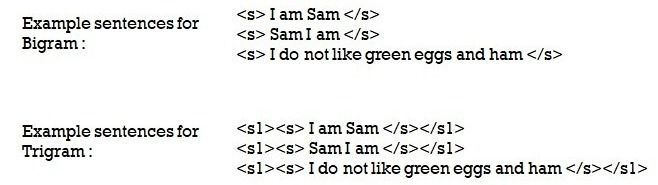

### Q1. Calculate all bigram and trigram probabilities for the above example sentences

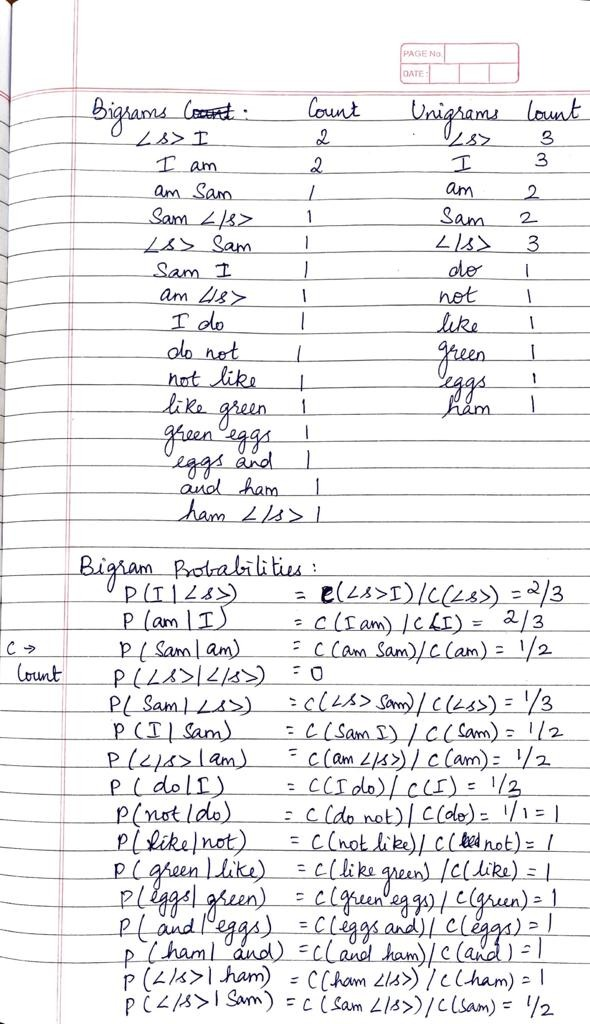

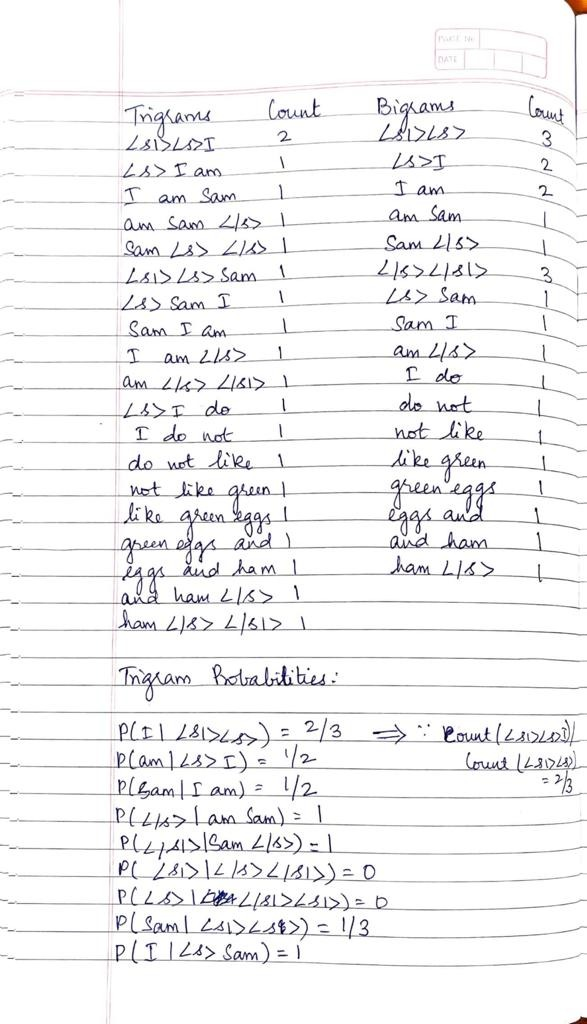

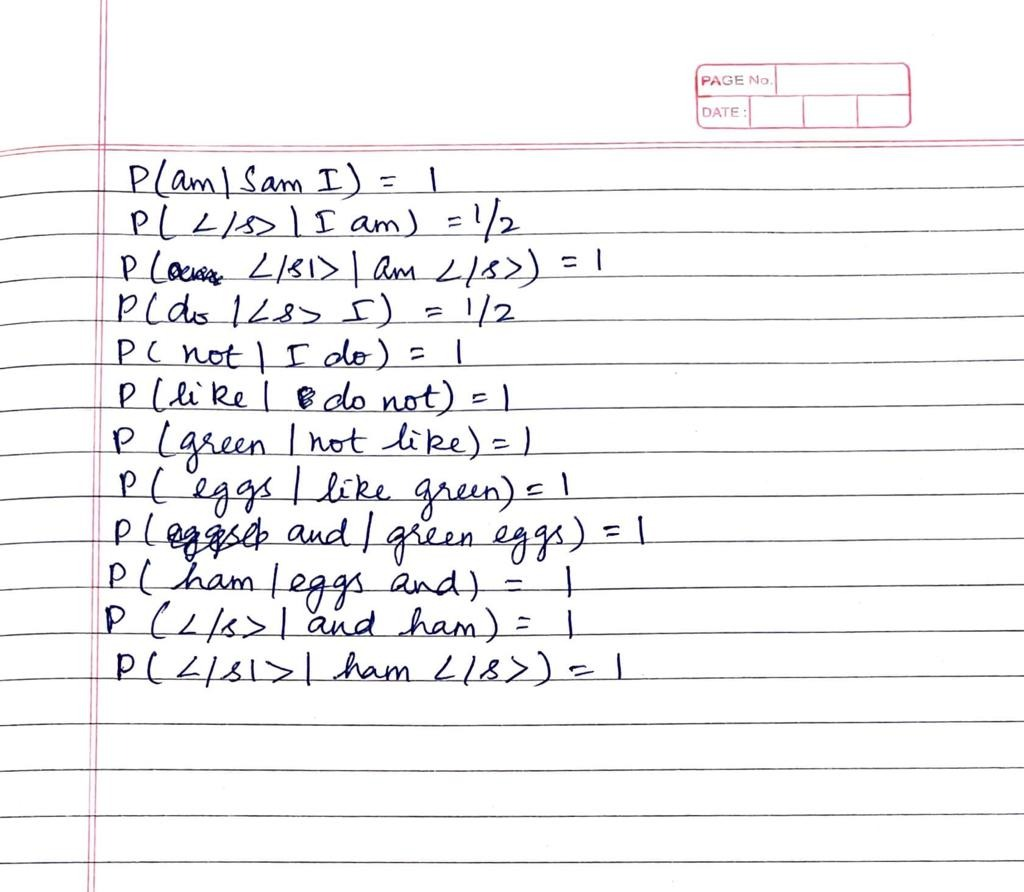

### Q2. Write python code to compute bigram and trigram probabilities

In [7]:
def N_gram(words,n):
    ngrams_list = []
    for i in range(len(words)-n+1):
        temp_list = [words[j] for j in range(i,i+n)]
        ngrams_list.append(" ".join(temp_list))
    return ngrams_list

def ngram_probability(sentence,n):
    # to store the probabilities
    probs = defaultdict(list)
    ngrams = []
    prev = []
    for s in sentence:
        # split sentence to words
        w = s.split()
        # getting the n grams and n-1 grams
        ngrams.extend(N_gram(w,n))
        prev.extend(N_gram(w,n-1))
    words = ' '.join(sentence).split()
    nlength = len(N_gram(words,n))
    # Term frequencies of the n grams and n-1 grams
    ngramsTF = dict(Counter(ngrams))
    prevTF = dict(Counter(prev))
    print("trigrams")
    print(ngramsTF)
    print("bigrams")
    print(prevTF)
    # store the key
    probskey = ""
    # loop through and calculate probability and add it to dict
    for i in range(nlength):
        j = i + n - 1
        prevwords =  ' '.join(words[j-n+1:j])
        curr = words[j]
        probskey = "P(" + curr + "|" + prevwords + ")"
        val = prevwords + " " + curr
        if prevTF.get(prevwords) != None:
            probs[probskey] = ngramsTF.get(val,0.0) / prevTF.get(prevwords)
        else:
            probs[probskey] = 0.0
    return dict(probs)

In [5]:
example_sentence1 = ["<s> I am Sam </s>","<s> Sam I am </s>","<s> I do not like green eggs and ham </s>"]
example_sentence2 = ["<s1> <s> I am Sam </s> </s1>","<s1> <s> Sam I am </s> </s1>","<s1> <s> I do not like green eggs and ham </s> </s1>"]

In [3]:
ngram_probability(example_sentence1,2)

{'<s>': 3, 'I': 3, 'am': 2, 'Sam': 2, '</s>': 3, 'do': 1, 'not': 1, 'like': 1, 'green': 1, 'eggs': 1, 'and': 1, 'ham': 1}


{'P(I|<s>)': 0.6666666666666666,
 'P(am|I)': 0.6666666666666666,
 'P(Sam|am)': 0.5,
 'P(</s>|Sam)': 0.5,
 'P(<s>|</s>)': 0.0,
 'P(Sam|<s>)': 0.3333333333333333,
 'P(I|Sam)': 0.5,
 'P(</s>|am)': 0.5,
 'P(do|I)': 0.3333333333333333,
 'P(not|do)': 1.0,
 'P(like|not)': 1.0,
 'P(green|like)': 1.0,
 'P(eggs|green)': 1.0,
 'P(and|eggs)': 1.0,
 'P(ham|and)': 1.0,
 'P(</s>|ham)': 1.0}

In [8]:
ngram_probability(example_sentence2,3)

trigrams
{'<s1> <s> I': 2, '<s> I am': 1, 'I am Sam': 1, 'am Sam </s>': 1, 'Sam </s> </s1>': 1, '<s1> <s> Sam': 1, '<s> Sam I': 1, 'Sam I am': 1, 'I am </s>': 1, 'am </s> </s1>': 1, '<s> I do': 1, 'I do not': 1, 'do not like': 1, 'not like green': 1, 'like green eggs': 1, 'green eggs and': 1, 'eggs and ham': 1, 'and ham </s>': 1, 'ham </s> </s1>': 1}
bigrams
{'<s1> <s>': 3, '<s> I': 2, 'I am': 2, 'am Sam': 1, 'Sam </s>': 1, '</s> </s1>': 3, '<s> Sam': 1, 'Sam I': 1, 'am </s>': 1, 'I do': 1, 'do not': 1, 'not like': 1, 'like green': 1, 'green eggs': 1, 'eggs and': 1, 'and ham': 1, 'ham </s>': 1}


{'P(I|<s1> <s>)': 0.6666666666666666,
 'P(am|<s> I)': 0.5,
 'P(Sam|I am)': 0.5,
 'P(</s>|am Sam)': 1.0,
 'P(</s1>|Sam </s>)': 1.0,
 'P(<s1>|</s> </s1>)': 0.0,
 'P(<s>|</s1> <s1>)': 0.0,
 'P(Sam|<s1> <s>)': 0.3333333333333333,
 'P(I|<s> Sam)': 1.0,
 'P(am|Sam I)': 1.0,
 'P(</s>|I am)': 0.5,
 'P(</s1>|am </s>)': 1.0,
 'P(do|<s> I)': 0.5,
 'P(not|I do)': 1.0,
 'P(like|do not)': 1.0,
 'P(green|not like)': 1.0,
 'P(eggs|like green)': 1.0,
 'P(and|green eggs)': 1.0,
 'P(ham|eggs and)': 1.0,
 'P(</s>|and ham)': 1.0,
 'P(</s1>|ham </s>)': 1.0}